# **Tugas - 2**

Buatlah model CNN untuk klasifikasi dataset MNIST.

---


### **Import Library**

In [2]:
import tensorflow as tf#untuk pengembangan jaringan saraf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

### **Memuat dan Memproses Dataset MNIST**

In [3]:
# Memuat dataset MNIST
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

# Normalisasi nilai piksel ke rentang 0 dan 1
train_images, test_images = train_images / 255.0, test_images / 255.0

# Mengubah bentuk data agar sesuai dengan model (28x28x1)
train_images = train_images.reshape(train_images.shape[0], 28, 28, 1)
test_images = test_images.reshape(test_images.shape[0], 28, 28, 1)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


### **Membuat Model CNN**

In [4]:
# Membuat model Sequential
model = models.Sequential()

# Menambahkan layer konvolusi dan pooling
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

# Flattening dan menambahkan layer Dense
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))  # Output untuk 10 kelas


c:\Users\ichap\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


### **Mengompilasi Model**

In [5]:
# Mengompilasi model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


### **Melatih Model**

In [6]:
# Melatih model
history = model.fit(
    train_images, 
    train_labels, 
    epochs=10, 
    validation_data=(test_images, test_labels)
    )


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.8925 - loss: 0.3444 - val_accuracy: 0.9852 - val_loss: 0.0492
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9853 - loss: 0.0462 - val_accuracy: 0.9872 - val_loss: 0.0427
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9899 - loss: 0.0325 - val_accuracy: 0.9881 - val_loss: 0.0347
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9915 - loss: 0.0250 - val_accuracy: 0.9911 - val_loss: 0.0288
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9934 - loss: 0.0198 - val_accuracy: 0.9882 - val_loss: 0.0339
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9950 - loss: 0.0149 - val_accuracy: 0.9913 - val_loss: 0.0301
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 7ms/step - accuracy: 0.9956 - loss: 0.0124 - val_accuracy: 0.9921 - val_loss: 0.0296
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9969 - loss: 0

### **Evaluasi Model**

313/313 - 1s - 2ms/step - accuracy: 0.9920 - loss: 0.0295
Test accuracy: 0.9919999837875366


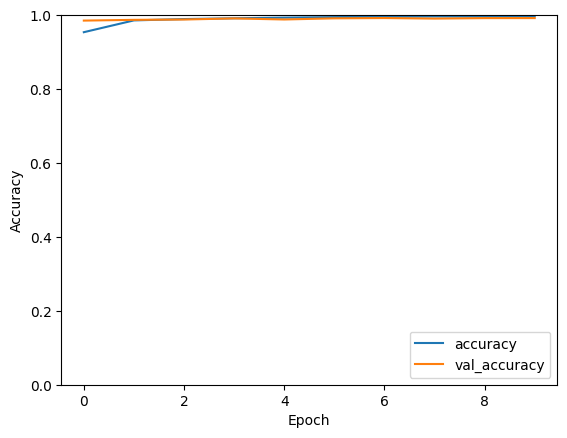

In [7]:
# Mengevaluasi model
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print("Test accuracy:", test_acc)

# Menggambarkan akurasi pelatihan dan loss
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()
